# Introducción

El "World Happiness Report" evalua la felicidad de los países como una medida del desarrollo de una sociedad más igualitaria. El informe sigue ganando reconocimiento mundial a medida que gobiernos, organizaciones no gubernamentales y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar sus decisiones tanto políticas como económicas.

Líderes expertos en campos como: economía, psicología, análisis de encuestas, estadísticas nacionales, salud y políticas públicas, describen cómo las mediciones del bienestar pueden utilizarse eficazmente para evaluar el progreso de las naciones. Los informes revisan el estado de la felicidad en el mundo y muestran cómo la nueva ciencia de la felicidad proporciona un mayor conocimiento sobre cómo los indicadores afectan a las naciones.

## En este análisis, exploraremos:

*   Cómo las diferentes metricas se comportan respecto del Indice de Felicidad y cuales tienen mayor indicencia.
*   Cómo varia la felicidad a nivel geografico
*   Analizar si existen evidencia empirica para concluir que ciertas regiones son más felices que otras.


In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from scipy.stats import ttest_ind, wilcoxon, ttest_rel,linregress



In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
raw_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Portfolio//world-happiness-report.csv')


In [88]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [89]:
raw_data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


# Sobre las metricas...

*   Ladder score(Happiness Index): Indice de felicidad o bienestar subjetivo, es el promedio nacional de las evaluaciones.

*   Logged GDP per capita: Es el PIB/per capita del país.

*   Social support: Se refiere a la asistencia o apoyo proporcionado por miembros de organizaciones sociales a un individuo.

*   Healthy life expectancy: Es la vida media en buena salud - es decir, sin limitación irreversible de la actividad en la vida diaria o incapacidades - de una generación ficticia creada a partir de metricas como la "mortalidad" y "morbilidad".

*   Freedom to make life choices: La libertad para tomar decisiones de vida es el promedio nacional de respuestas binarias a la pregunta “¿Está satisfecho o insatisfecho con su libertad para elegir lo que hace con su vida?”.

*   Generosity: La generosidad es el residual de la regresión del promedio nacional de la respuesta a la pregunta “¿Ha donado dinero a una organización benéfica en el último mes?” sobre el PIB per cápita.


*   Perceptions of corruption: La medida es el promedio nacional de las respuestas de la encuesta a dos preguntas: “¿Está la corrupción generalizada en el gobierno o no?” y “¿Está la corrupción generalizada en las empresas o no?”.

In [90]:
pd.concat([raw_data.head(5),raw_data.tail(5)],axis=0)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [91]:
raw_data['Regional indicator'].value_counts().to_dict()

{'Sub-Saharan Africa': 36,
 'Western Europe': 21,
 'Latin America and Caribbean': 20,
 'Middle East and North Africa': 17,
 'Central and Eastern Europe': 17,
 'Commonwealth of Independent States': 12,
 'Southeast Asia': 9,
 'South Asia': 7,
 'East Asia': 6,
 'North America and ANZ': 4}

In [92]:
raw_data['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

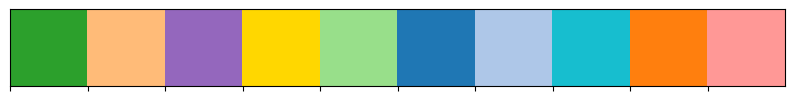

In [93]:
color=['#2ca02c', '#ffbb78', '#9467bd', '#ffd700', '#98df8a', '#1f77b4', '#aec7e8', '#17becf', '#ff7f0e', '#ff9896']
sns.palplot(color)

In [94]:
color_mapping = {
    'Western Europe': '#2ca02c',
    'North America and ANZ': '#ffbb78',
    'Middle East and North Africa': '#9467bd',
    'Latin America and Caribbean': '#ffd700',
    'Central and Eastern Europe': '#98df8a',
    'East Asia': '#1f77b4',
    'Southeast Asia': '#aec7e8',
    'Commonwealth of Independent States': '#17becf',
    'Sub-Saharan Africa': '#ff7f0e',
    'South Asia': '#ff9896'}

In [95]:
raw_data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

# Selección de las variables

Para nuestro análisis, nos enfocaremos únicamente en indicadores del cuestionario de "World Happiness Index", no en variables derivadas:

*   Las variables 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', se refieren a medidas estadisticas del intervalo de confianza.

*   El World Happiness Report presenta [Dystopia](https://worldhappiness.report/faq/) como un benchmark donde todos los paises se pueden comparar de forma favorable.

*   "Explained by:..." es la posición del pais en un ranking de la variable.

Dado que todos los indicadores son derivados, no se contemplarán en el análisis.

In [96]:
def feature_clean(df):
  df=df.copy()
  df = df.drop(columns=[col for col in df.columns if 'Dystopia' in col or 'Explained' in col])
  df = df.drop(columns=['Standard error of ladder score','upperwhisker','lowerwhisker'],axis=1)
  df=df.rename(columns={'Ladder score':'Happiness Index'})
  return df

In [97]:
data=feature_clean(raw_data)

In [98]:
data

,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


#  ¿Cómo las metricas afectan el índice de felicidad?

In [99]:
corr_matrix=data[[ 'Happiness Index',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
corr_values=corr_matrix.corr()['Happiness Index'].sort_values(ascending=False)

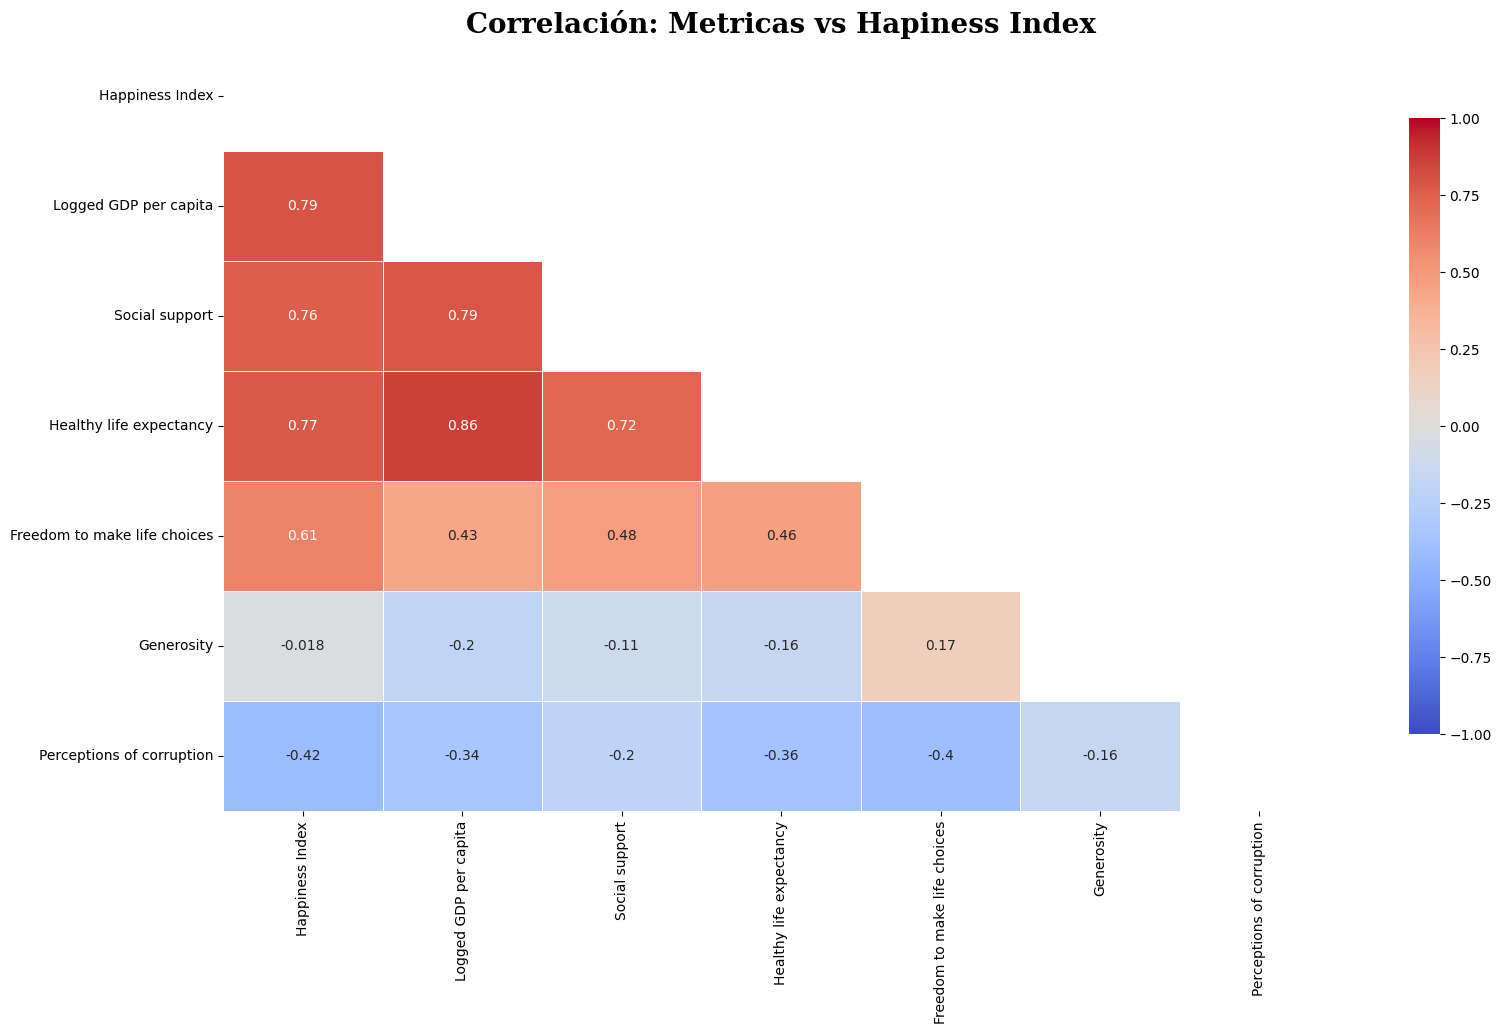

In [100]:
plt.figure(figsize=(18,10))
plt.title("Correlación: Metricas vs Hapiness Index",family='Serif', weight='bold', size=20)
mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=bool))
sns.heatmap(corr_matrix.corr(), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": .8})
for s in ['right','top']:
    plt.gca().spines[s].set_visible(False)

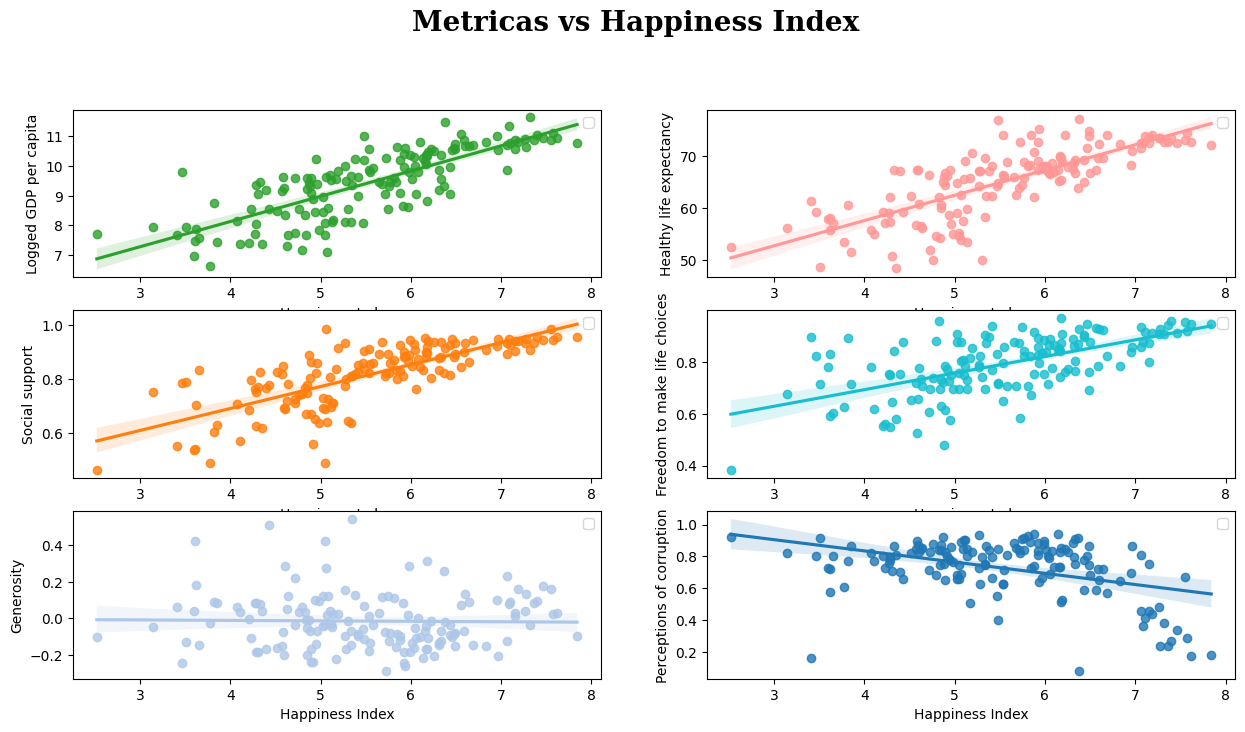

In [101]:
datafig=plt.figure(figsize=(15,10))
plt.suptitle("Metricas vs Happiness Index",family='Serif', weight='bold', size=20)
j=0
for i in corr_values.index[1:]:

    ax=plt.subplot(421+j)
    ax=sns.regplot(data=corr_matrix, x='Happiness Index',y=i, color=color[-j])
    ax.legend('')
    j=j+1

plt.legend('')

Los factores **económicos y sociales** muestran una correlación positiva con el índice de felicidad. En contraste, la percepción de corrupción presenta una correlación negativa. Por otro lado, la generosidad no muestra una relación concluyente.

Para entender mejor qué variables tienen mayor incidencia en la predicción del índice de felicidad, utilizaremos un modelo de Random Forest para el análisis.

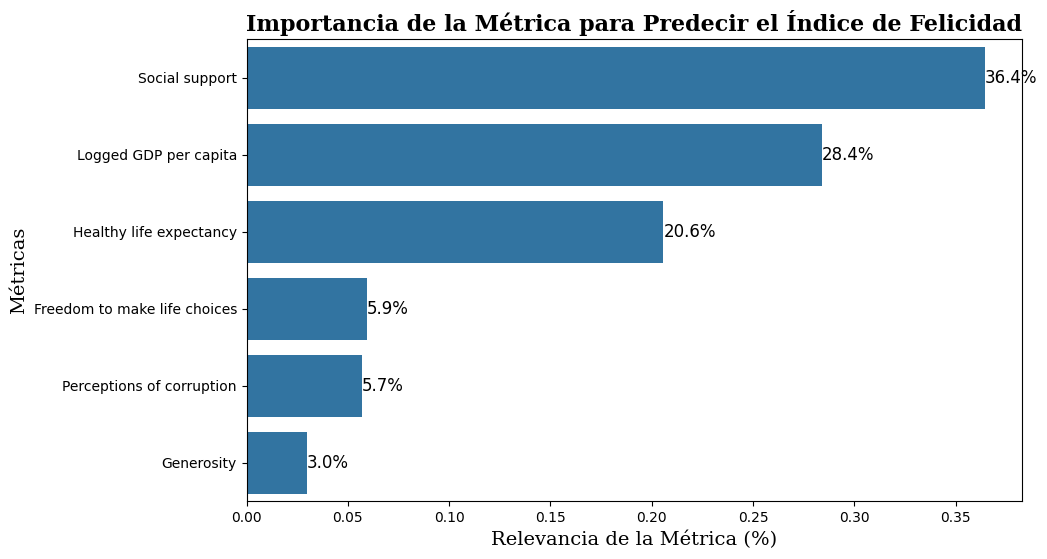

In [128]:
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Happiness Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=250, random_state=42)
model.fit(X_train, y_train)

relevancia = model.feature_importances_
metricas = X.columns

importance_df = pd.DataFrame({'Metricas': metricas, 'Relevancia': relevancia}).sort_values(by='Relevancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Relevancia', y='Metricas', data=importance_df)
plt.title('Importancia de la métrica para predecir el Índice de Felicidad', family='Serif', weight='bold', size=16)

for i in range(len(importance_df)):
    plt.text(importance_df['Relevancia'].iloc[i], i, f"{importance_df['Relevancia'].iloc[i] * 100:.1f}%", va='center', ha='left', color='black', size=12)

plt.xlabel('Relevancia de la Métrica (%)', family='Serif', size=14)
plt.ylabel('Métricas', family='Serif', size=14)
plt.show()

Este punto es muy importante, ya que **respalda la idea de que la correlación no implica causalidad**.

Aunque el *PIB per cápita es la métrica que muestra una mayor correlación *con el índice de felicidad, no necesariamente tiene el mayor impacto causal. Esto se debe al principio de causalidad en estadística, que nos recuerda que dos variables pueden estar correlacionadas sin que una cause directamente a la otra.

# ¿Cómo varia la felicidad a nivel geografico?

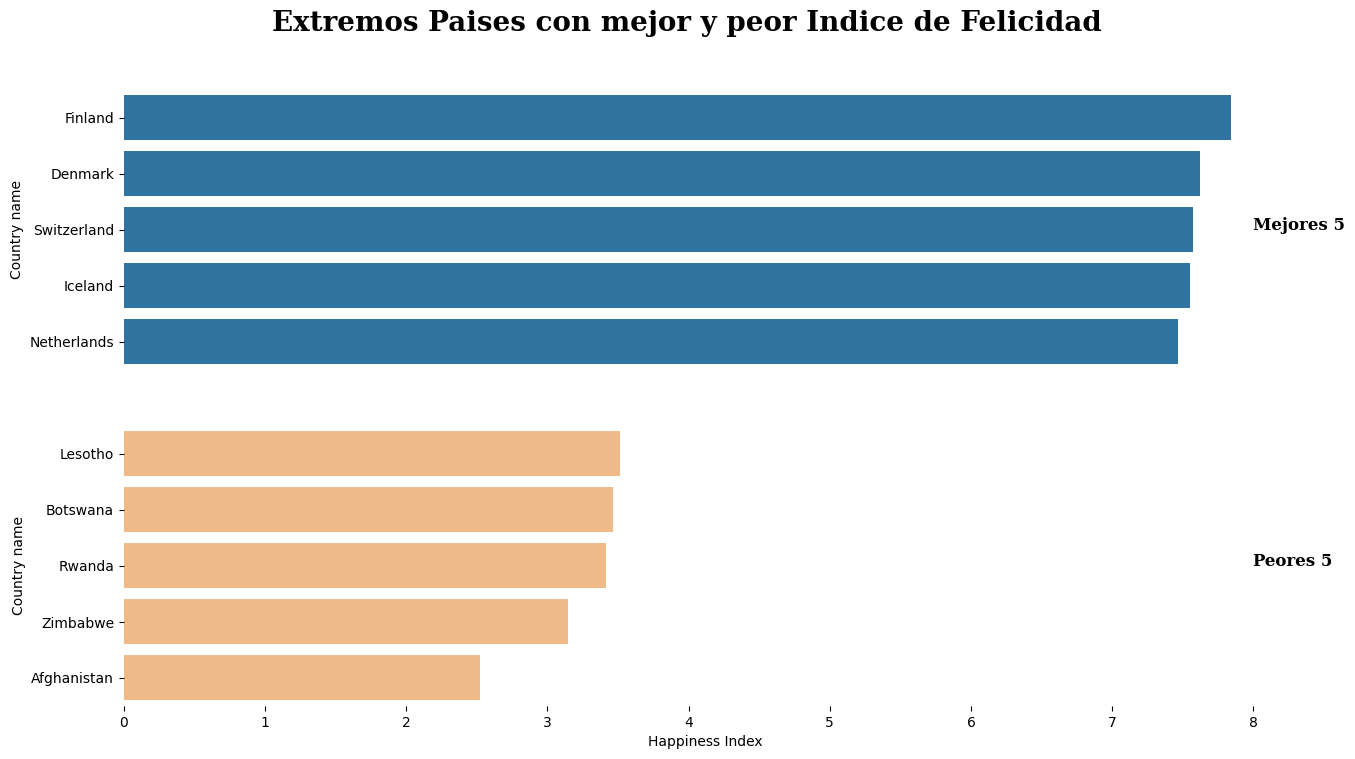

In [102]:
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Extremos Paises con mejor y peor Indice de Felicidad", family='Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])
data.sort_values(by='Happiness Index', ascending=False, inplace=True)

top_5=data.head(5)
bot_5= data.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Happiness Index'],y=top_5['Country name'],color=color[5])

ax1.xaxis.set_visible(False)
ax1.annotate("Mejores 5",xy=(8,2), family='Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Happiness Index'],y=bot_5['Country name'],color=color[1])
ax2.annotate("Peores 5 ",xy=(8,2), family='Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

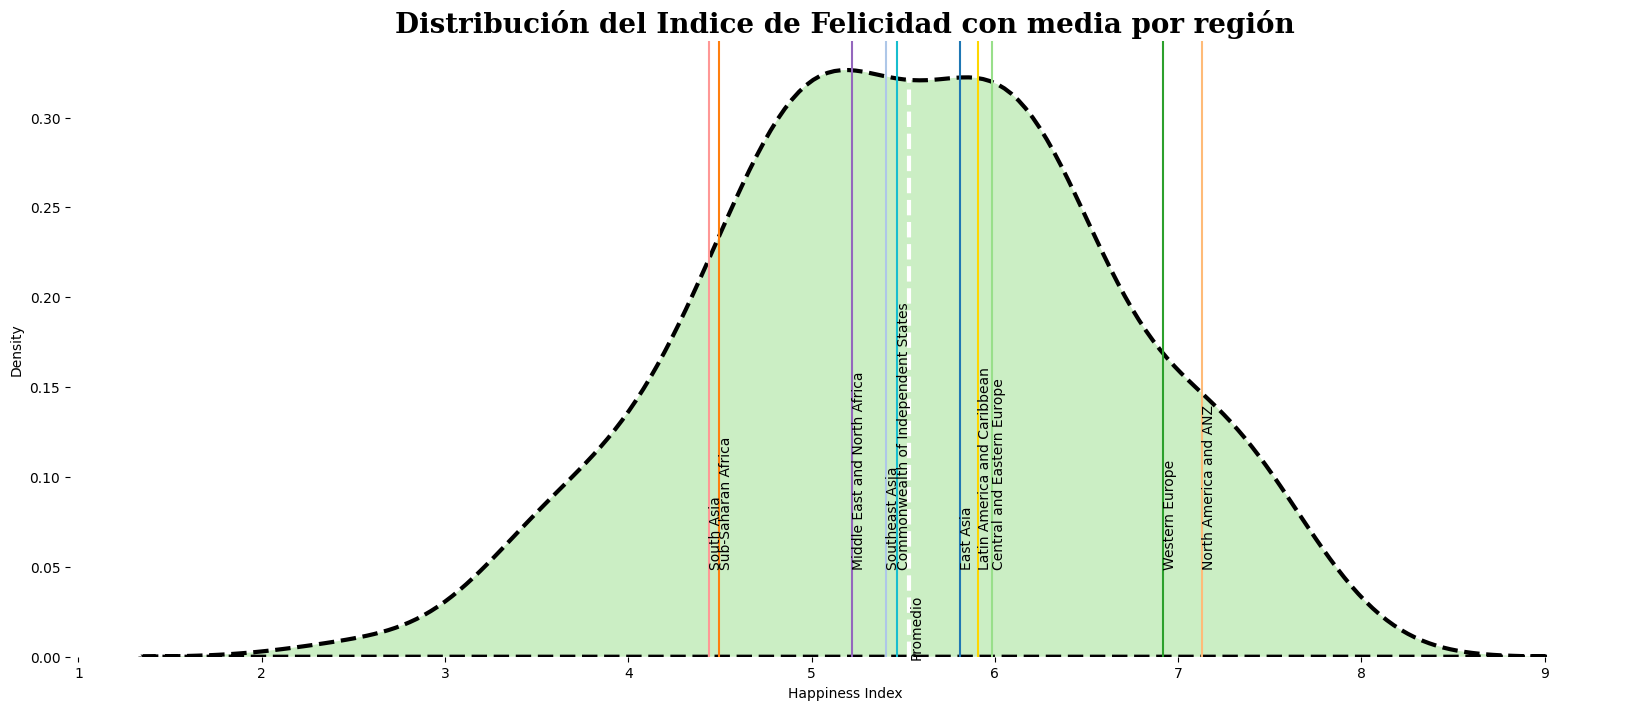

In [142]:
fig=plt.figure(figsize=(20,8))
plt.title("Distribución del Indice de Felicidad con media por región",family='Serif', weight='bold', size=20)
sns.kdeplot(data['Happiness Index'], fill=True, color=color[4], linewidth=3, ls='--', edgecolor='black', alpha=0.5)
plt.axvline(x=data['Happiness Index'].mean(), linewidth=3, ls='--', color='white')
pop=x=data['Happiness Index'].mean()

plt.text(x=data['Happiness Index'].mean(),y=0, s='Promedio', rotation=90)

for i in data['Regional indicator'].unique():
    m=data[data['Regional indicator']==i]['Happiness Index'].mean()

    plt.axvline(x=m, color=color_mapping[i])
    plt.text(x=m, y=0.05, rotation=90,s=i)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)


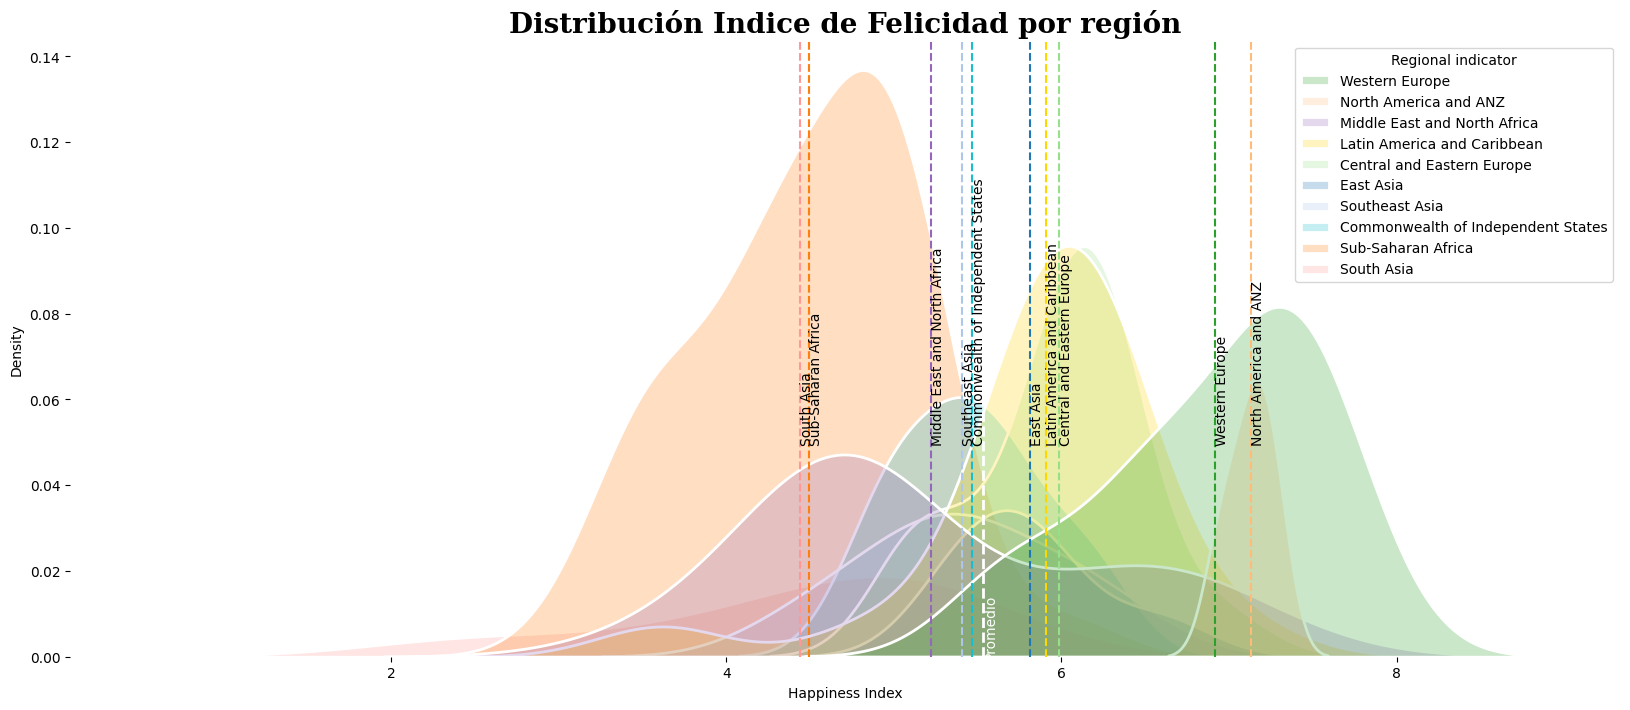

In [104]:
plt.figure(figsize=(20,8))
plt.title('Distribución Indice de Felicidad por región',family='Serif',weight='bold',size=20)
sns.kdeplot(data, x='Happiness Index', hue='Regional indicator', fill=True,linewidth=2, edgecolor='white',palette=[color_mapping[region] for region in data['Regional indicator'].unique()])
plt.axvline(data['Happiness Index'].mean(),ls='--',color='w',linewidth=2)
plt.text(x=data['Happiness Index'].mean(),y=0,s='Promedio',color='w',rotation=90)
for value in data['Regional indicator'].unique():
  plt.axvline(x=data[data['Regional indicator']==value]['Happiness Index'].mean(),ls='--',color=color_mapping[value])
  plt.text(x=data[data['Regional indicator']==value]['Happiness Index'].mean(),y=0.05,rotation=90,s=value)

for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

### Si bien, se puede ver que la distribución del Indice de Felicidad entre las regiones de **North America and ANZ** y **South Asia** difieren, no se puede concluir de forma visual, por lo que debemos evaluarlo estadisticamente.

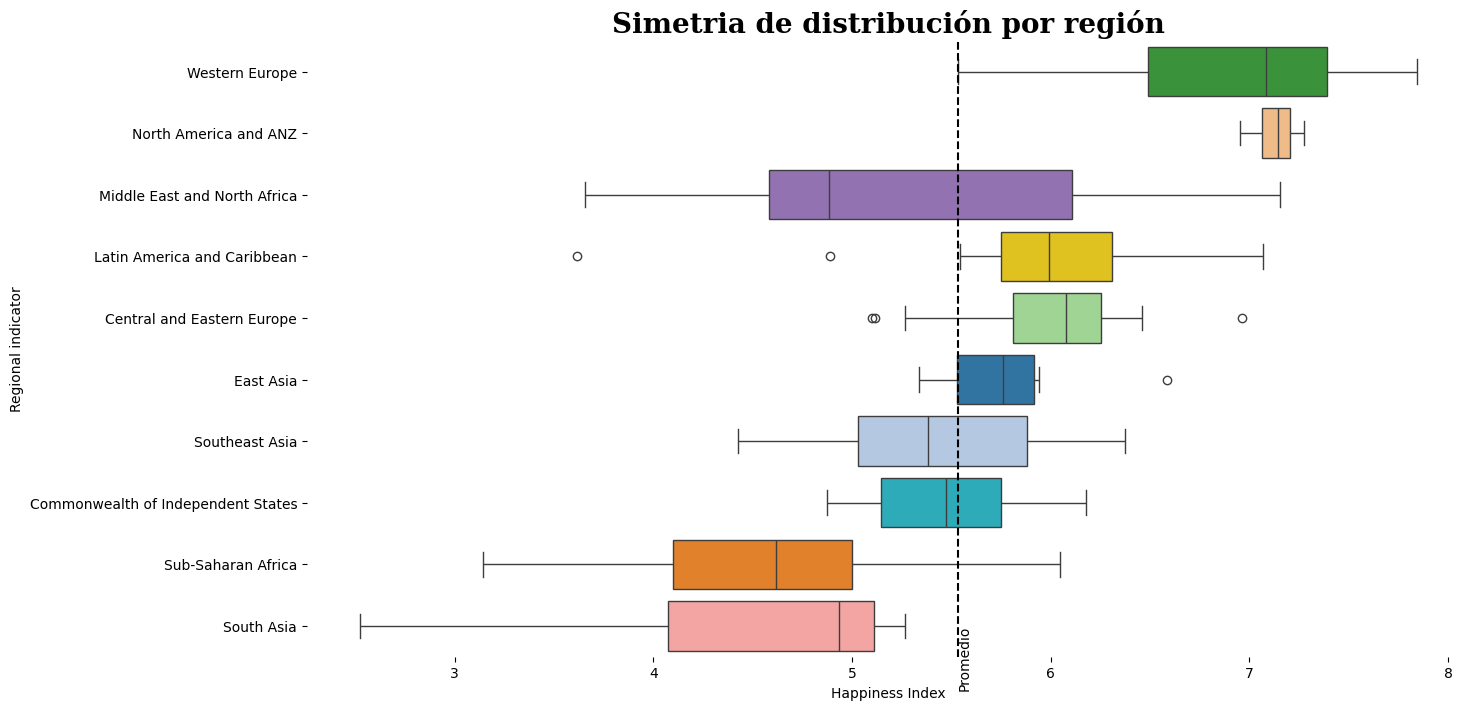

In [105]:
fig=plt.figure(figsize=(15,8))
plt.title("Simetria de distribución por región",family='Serif', weight='bold', size=20)
sns.boxplot(x=data['Happiness Index'],y=data['Regional indicator'],hue=data['Regional indicator'], palette=[color_mapping[region] for region in data['Regional indicator'].unique()])
plt.axvline(data['Happiness Index'].mean(), c='black',ls='--')
plt.text(x=data['Happiness Index'].mean(),y=10,s='Promedio', size=10,rotation=90,color='black')

for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

In [160]:
outlier_top_values = []
outlier_bottom_values = []
outlier_top_countries = []
outlier_bottom_countries = []

for i, region in enumerate(data['Regional indicator'].unique()):
    regional_data = data[data['Regional indicator'] == region]
    Q1 = regional_data['Happiness Index'].quantile(0.25)
    Q3 = regional_data['Happiness Index'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    region_outliers_bottom = regional_data[regional_data['Happiness Index'] < lower_bound]
    outlier_bottom_values.extend(region_outliers_bottom['Happiness Index'])
    outlier_bottom_countries.extend(region_outliers_bottom['Country name'])

    region_outliers_top = regional_data[regional_data['Happiness Index'] > upper_bound]
    outlier_top_values.extend(region_outliers_top['Happiness Index'])
    outlier_top_countries.extend(region_outliers_top['Country name'])

print("Países con valores atípicos superiores en sus regiones:")
print(outlier_top_countries)
print(outlier_top_values)

print("Países con valores atípicos inferiores en sus regiones:")
print(outlier_bottom_countries)
print(outlier_bottom_values)


Países con valores atípicos superiores en sus regiones:
['Czech Republic', 'Taiwan Province of China']
[6.965, 6.584]
Países con valores atípicos inferiores en sus regiones:
['Venezuela', 'Haiti', 'Albania', 'North Macedonia']
[4.892, 3.615, 5.117, 5.101]


In [135]:
data[data['Country name'].isin(['Taiwan Province of China','Czech Republic','Venezuela', 'Haiti', 'Albania', 'North Macedonia'])]

,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868
23,Taiwan Province of China,East Asia,6.584,10.871,0.898,69.600,0.784,-0.070,0.721
92,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901
93,North Macedonia,Central and Eastern Europe,5.101,9.693,0.805,65.474,0.751,0.038,0.905
106,Venezuela,Latin America and Caribbean,4.892,9.073,0.861,66.700,0.615,-0.169,0.827
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721


In [157]:
data['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

Los países con **Indices de felicidad** alejados a los de su región, tienen en común que han estado en **transiciones politicas** durante las últimas décadas.

Es interesante el caso de Taiwan, ya que, si bien es una provicia marcada por sus conflitos politicos con China no parece ser afectada en la felicidad o cómo el estudio esta midiendo el escenario político, tal vez, la percepción de la corrupción no debiera ser la única medida en régimenes totalitarios.


## Test de hipótesis - ¿Existe una diferencia siginificativa entre regiones,cómo se comporta America Latina?

H0 = No existe diferencia significativa

H1 = Existe una diferencia significativa

In [153]:

def hypo_test(reg1,reg2):
    r1 = data[data['Regional indicator']==reg1]['Happiness Index']
    r2 = data[data['Regional indicator']==reg2]['Happiness Index']
    t1="Test de hipotesis: {} vs {}".format(reg1,reg2)
    stats, p_value= ttest_ind(r1, r2)
    if p_value <0.05:
        t2="Como p_value es {} < 0.05, podemos descartar H0 y decir que hay diferencias significativas entre regiones".format(np.round(p_value,4))
    else:
        t2="Como P_value es {} > 0.05, no podemos rechazar H0, por lo que no hay diferencia significativa entre regiones".format(np.round(p_value,4))
    fig=plt.figure(figsize=(15,3))
    plt.title(t1,family='Serif', weight='bold', size=20)
    plt.text(x=plt.xlim()[1]/2,y=plt.ylim()[1]/2,s=t2,ha='center', family='Serif', weight='bold', size=15)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    return

In [154]:
reg=data['Regional indicator'].unique()
reg

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

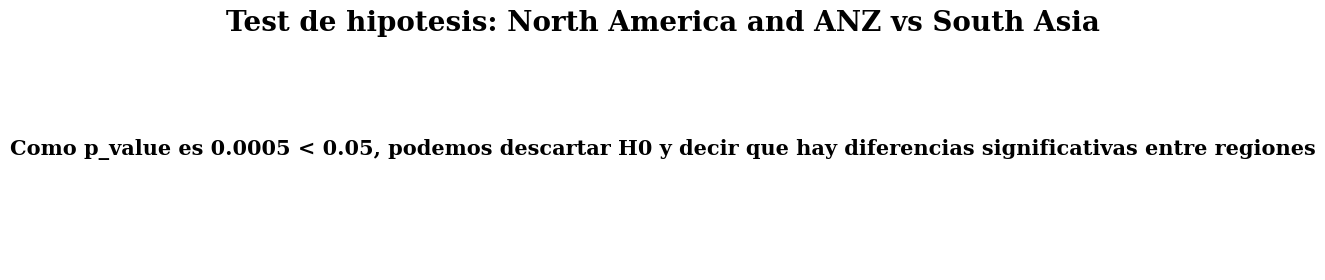

In [159]:
hypo_test(reg[1],reg[-1])

### Aqui podemos ver claramente que efectivamente hay diferencias estadisticas entre **North America and ANZ** y **South Asia**, pero...

# ¿A quién se parece America Latina en cuanto a "indices de felicidad"?

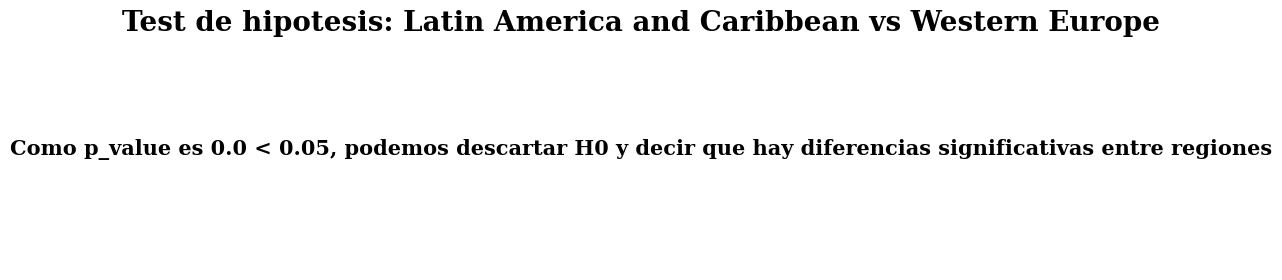

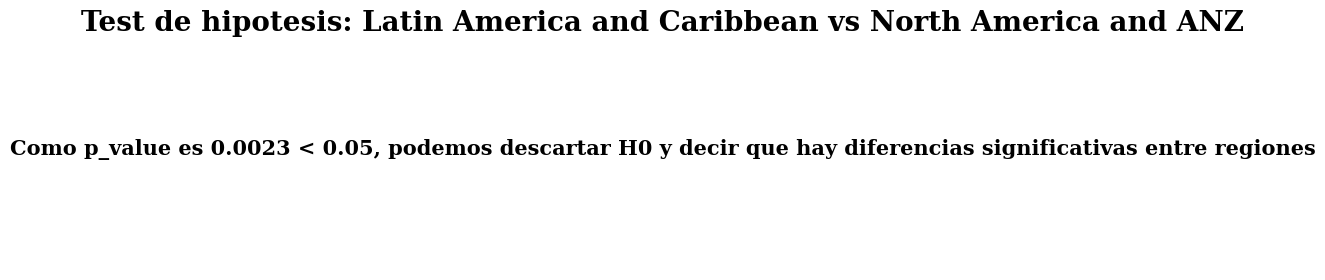

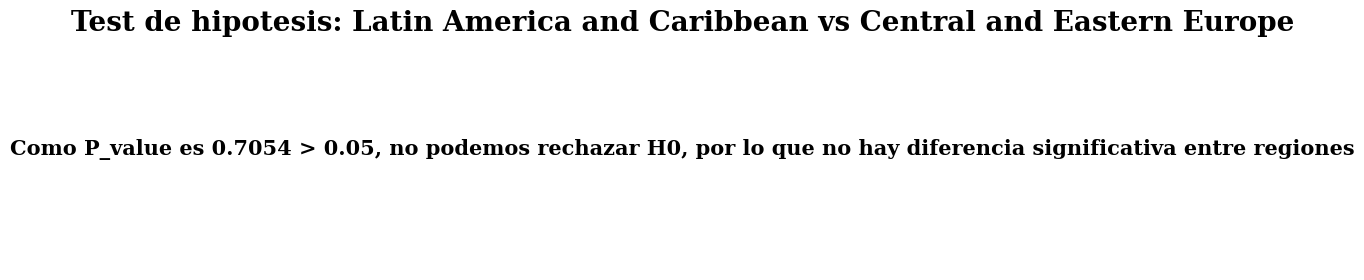

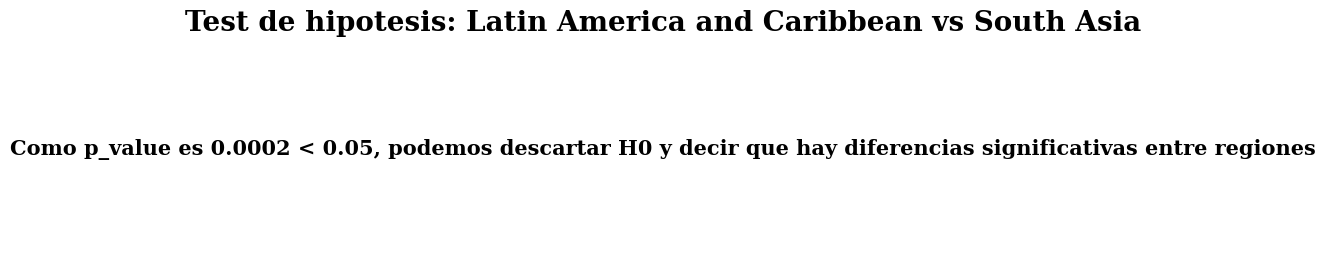

In [155]:
hypo_test(reg[3],reg[0])
hypo_test(reg[3],reg[1])

hypo_test(reg[3],reg[4])
hypo_test(reg[3],reg[-1])

### En conclusion, America Latina y el Caribe se parece más a Europa del Este y Asia que a nuestros homologos de la OCDE ('Western Europe' & 'North America and ANZ')